# Shapes and Figures

## Circle

In [1]:
import matplotlib.pyplot as plt

In [2]:
def create_circle(r):
    circle = plt.Circle((0,0), radius = r) # a built-in function
    return circle

In [3]:
def show_shape(patch):
    ax = plt.gca() # returns a reference to the Axes
    ax.add_patch(patch)
    plt.axis('scaled')
    plt.show()

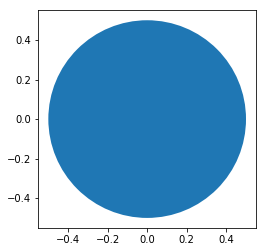

In [4]:
if __name__ == '__main__':
    c = create_circle(0.5)
    show_shape(c)

## Ellipse

In [5]:
def create_ellipse(w = 2, h=1):
    from matplotlib.patches import Ellipse
    ellipse = Ellipse((0,0), w, h) # a built-in function
    return ellipse

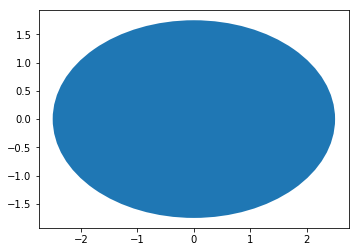

In [6]:
if __name__ == '__main__':
    c = create_ellipse(5, 3.5)
    show_shape(c)

## Rectangle

In [7]:
def create_polygon(w = 2, h=1):
    from matplotlib.patches import Rectangle
    rectangle = Rectangle((0,0), w, h) # a built-in function
    return rectangle

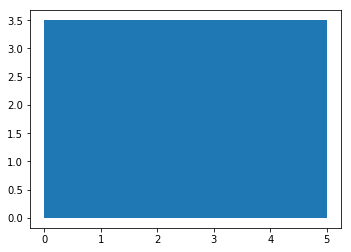

In [8]:
if __name__ == '__main__':
    c = create_polygon(5, 3.5)
    show_shape(c)

## Animated Figures

In [9]:
from matplotlib import pyplot as plt
from matplotlib import animation

In [10]:
def create_circle():
    circle = plt.Circle((0,0), 0.05) # a built-in function
    return circle

In [11]:
def update_radius(i, circle):
    circle.radius = i * 0.5
    return circle,

In [12]:
def create_animation():
    fig = plt.figure()
    #fig = plt.gcf()
    ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
    ax.set_aspect('equal')
    circle = create_circle()
    ax.add_patch(circle)
    anim = animation.FuncAnimation(fig, update_radius, fargs = (circle,), frames=30, interval=50, blit=True)
    plt.title('Simple Circle Animation')
    plt.show()

In [13]:
import matplotlib; matplotlib.use('TkAgg')
%matplotlib tk #still doesn't work
if __name__ == '__main__':
    create_animation()

## Aimating a Projectile's Trajectory

In [29]:
from matplotlib import pyplot as plt
from matplotlib import animation
import scipy.constants as const
import math

In [30]:
g = const.g

In [31]:
def get_intervals(u, theta):
    t_flight = 2 * u * math.sin(theta) / g
    intervals = []
    start = 0
    interval = 0.005
    while start < t_flight:
        intervals.append(start)
        start += interval
    return intervals

In [32]:
def update_position(i, circle, intervals, u, theta):
    t = intervals[i]
    x = u * math.cos(theta) * t
    y = u * math.sin(theta) * t - 0.5 * g * t * t
    circle.center = x, y
    return circle,

In [35]:
def create_animation(u, theta):
    
    intervals = get_intervals(u, theta)
    
    xmin = 0
    xmax = u * math.cos(theta) * intervals[-1]
    ymin = 0
    t_max = u * math.sin(theta) / g
    ymax = u * math.sin(theta) * t_max - 0.5 * g * t_max ** 2
    fig = plt.gcf()
    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))
    
    circle = plt.Circle((xmin, ymin), 1.0)
    ax.add_patch(circle)
    anim = animation.FuncAnimation(fig, update_position,
                                   fargs=(circle, intervals, u, theta),
                                  frames=len(intervals), interval = 1,
                                  repeat=False)
    plt.title('Projectile Motion')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [36]:
if __name__ == '__main__':
    try:
        u = float(input('Enter the initial velocity (m/s): '))
        theta = float(input('Enter the angle of projection (degrees): '))
    except ValueError:
        print('You entered an invalid input')
    else:
        theta = math.radians(theta)
        create_animation(u, theta)

Enter the initial velocity (m/s): 25
Enter the angle of projection (degrees): 40
